In [1]:
import numpy as np
import pandas as pd
from pysolar.solar import *
import h5py
import os
import glob
import datetime
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as md
import warnings
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
warnings.filterwarnings('ignore')
import scipy.ndimage as ndimage
from matplotlib import cm
from matplotlib.colors import LogNorm
from sklearn import preprocessing
from scipy.integrate import quad
from scipy.integrate import trapz


In [2]:
def simple_read(path):
    with open(path) as f:
        first_line = f.readline()
        header_line = int(first_line[0:-2].split(",")[0])-1
        #all_lines = f.readlines()
    data = pd.read_csv(path, sep=',', skiprows=header_line)
    #date = all_lines[5][0:10].split(',')
    #dt = datetime(int(date[0]), int(date[1]), int(date[2]))

    acc = 0
    boo = False
    for letter in path:
        if letter == '2':
            boo = True
        elif boo and letter == '0':
            acc -= 1
            break
        acc += 1
    #print(path[:acc+4], path[acc+4:acc+6], path[acc+6:acc+8])
    dt = datetime(int(path[acc:acc+4]), int(path[acc+4:acc+6]), int(path[acc+6:acc+8]))
    
    for column in data.keys():
        if 'Time' in column:
            data[column] = dt + pd.to_timedelta(data[column], unit='seconds')
    return data.replace(-999999, 0)

In [3]:
DAY7 = simple_read('C:/Users/taiwoajayi/Documents/Extinction/activate-mrg1_hu25_20220607_R0_L1_20230523T125154.ict')
start_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:32:00"))
stop_index = np.where(DAY7["Time_Start"]==pd.to_datetime("2022-06-07 14:47:00"))
DAY7_subset =DAY7[start_index[0][0]:stop_index[0][0]]
DAY7_subset = DAY7_subset.replace(-888888, 0)
DAY7_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Pressure_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Sc550_submicron_amb_ZIEMBA,Sc450_submicron_ZIEMBA,...,gamma550_ZIEMBA,fRH550_RH20to80_ZIEMBA,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA,SSA_450nm_ZIEMBA,SSA_550nm_ZIEMBA,SSA_700nm_ZIEMBA,SSA_amb_550nm_ZIEMBA,stdPT_ZIEMBA
10397,2022-06-07 14:32:00,2022-06-07 14:32:01,32.250498,-64.999220,127.595,47.370,21.705,1000.690,22.625,23.875,...,0.155,1.245,0.615,0.525,0.0,0.0,0.0,0.0,0.0,1.0930
10398,2022-06-07 14:32:01,2022-06-07 14:32:02,32.249883,-64.998233,126.585,45.625,21.705,1000.730,24.015,24.615,...,0.245,1.395,0.620,0.530,0.0,0.0,0.0,0.0,0.0,1.0930
10399,2022-06-07 14:32:02,2022-06-07 14:32:03,32.249267,-64.997244,125.870,49.065,21.700,1000.550,23.895,25.450,...,0.305,1.520,0.625,0.540,0.0,0.0,0.0,0.0,0.0,1.0930
10400,2022-06-07 14:32:03,2022-06-07 14:32:04,32.248648,-64.996254,125.955,40.945,21.735,1000.850,21.175,24.125,...,0.310,1.535,0.635,0.560,0.0,0.0,0.0,0.0,0.0,1.0930
10401,2022-06-07 14:32:04,2022-06-07 14:32:05,32.248027,-64.995263,126.990,32.150,21.755,1001.140,21.990,24.315,...,0.265,1.445,0.640,0.570,0.0,0.0,0.0,0.0,0.0,1.0930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292,2022-06-07 14:46:55,2022-06-07 14:46:56,32.255021,-64.999573,2800.660,8501.310,9.430,728.710,0.000,2.075,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1.4385
11293,2022-06-07 14:46:56,2022-06-07 14:46:57,32.255098,-64.998248,2805.770,8518.170,9.405,728.240,0.000,2.680,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1.4395
11294,2022-06-07 14:46:57,2022-06-07 14:46:58,32.255152,-64.996919,2810.920,8534.370,9.380,727.790,0.000,3.425,...,0.000,0.000,0.000,1.650,0.0,0.0,0.0,0.0,0.0,1.4400
11295,2022-06-07 14:46:58,2022-06-07 14:46:59,32.255184,-64.995588,2816.140,8550.220,9.355,727.350,0.000,1.540,...,0.000,0.000,0.000,1.650,0.0,0.0,0.0,0.0,0.0,1.4405


In [4]:
list(DAY7_subset)

['Time_Start',
 ' Time_Stop',
 ' Latitude_THORNHILL',
 ' Longitude_THORNHILL',
 ' GPS_Altitude_THORNHILL',
 ' Pressure_Altitude_THORNHILL',
 ' Static_Air_Temp_THORNHILL',
 ' Static_Pressure_THORNHILL',
 ' Sc550_submicron_amb_ZIEMBA',
 ' Sc450_submicron_ZIEMBA',
 ' Sc550_submicron_ZIEMBA',
 ' Sc700_submicron_ZIEMBA',
 ' RH_Sc_submicron_ZIEMBA',
 ' Abs470_total_ZIEMBA',
 ' Abs532_total_ZIEMBA',
 ' Abs660_total_ZIEMBA',
 ' Ext532_submicron_amb_ZIEMBA',
 ' Ext532_submicron_ZIEMBA',
 ' gamma550_ZIEMBA',
 ' fRH550_RH20to80_ZIEMBA',
 ' AEscatAMB_450to700nm_ZIEMBA',
 ' AEscat_450to700nm_ZIEMBA',
 ' AEabsDRY_470to660nm_ZIEMBA',
 ' SSA_450nm_ZIEMBA',
 ' SSA_550nm_ZIEMBA',
 ' SSA_700nm_ZIEMBA',
 ' SSA_amb_550nm_ZIEMBA',
 ' stdPT_ZIEMBA']

In [5]:
DAY7_subset['Altitude'] = DAY7_subset[' GPS_Altitude_THORNHILL'].diff(periods=1)
#DAY7_subset = DAY7_subset['Altitude']
#DAY7_subset

In [6]:

# Add new column to the DataFrame
Day7 = DAY7_subset.assign(Altitude=DAY7_subset['Altitude'])
Day7 = Day7.replace(np.NaN, 0)
Day7


,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Pressure_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Sc550_submicron_amb_ZIEMBA,Sc450_submicron_ZIEMBA,...,fRH550_RH20to80_ZIEMBA,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA,SSA_450nm_ZIEMBA,SSA_550nm_ZIEMBA,SSA_700nm_ZIEMBA,SSA_amb_550nm_ZIEMBA,stdPT_ZIEMBA,Altitude
10397,2022-06-07 14:32:00,2022-06-07 14:32:01,32.250498,-64.999220,127.595,47.370,21.705,1000.690,22.625,23.875,...,1.245,0.615,0.525,0.0,0.0,0.0,0.0,0.0,1.0930,0.000
10398,2022-06-07 14:32:01,2022-06-07 14:32:02,32.249883,-64.998233,126.585,45.625,21.705,1000.730,24.015,24.615,...,1.395,0.620,0.530,0.0,0.0,0.0,0.0,0.0,1.0930,-1.010
10399,2022-06-07 14:32:02,2022-06-07 14:32:03,32.249267,-64.997244,125.870,49.065,21.700,1000.550,23.895,25.450,...,1.520,0.625,0.540,0.0,0.0,0.0,0.0,0.0,1.0930,-0.715
10400,2022-06-07 14:32:03,2022-06-07 14:32:04,32.248648,-64.996254,125.955,40.945,21.735,1000.850,21.175,24.125,...,1.535,0.635,0.560,0.0,0.0,0.0,0.0,0.0,1.0930,0.085
10401,2022-06-07 14:32:04,2022-06-07 14:32:05,32.248027,-64.995263,126.990,32.150,21.755,1001.140,21.990,24.315,...,1.445,0.640,0.570,0.0,0.0,0.0,0.0,0.0,1.0930,1.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292,2022-06-07 14:46:55,2022-06-07 14:46:56,32.255021,-64.999573,2800.660,8501.310,9.430,728.710,0.000,2.075,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1.4385,5.150
11293,2022-06-07 14:46:56,2022-06-07 14:46:57,32.255098,-64.998248,2805.770,8518.170,9.405,728.240,0.000,2.680,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1.4395,5.110
11294,2022-06-07 14:46:57,2022-06-07 14:46:58,32.255152,-64.996919,2810.920,8534.370,9.380,727.790,0.000,3.425,...,0.000,0.000,1.650,0.0,0.0,0.0,0.0,0.0,1.4400,5.150
11295,2022-06-07 14:46:58,2022-06-07 14:46:59,32.255184,-64.995588,2816.140,8550.220,9.355,727.350,0.000,1.540,...,0.000,0.000,1.650,0.0,0.0,0.0,0.0,0.0,1.4405,5.220


In [7]:
list(Day7)

['Time_Start',
 ' Time_Stop',
 ' Latitude_THORNHILL',
 ' Longitude_THORNHILL',
 ' GPS_Altitude_THORNHILL',
 ' Pressure_Altitude_THORNHILL',
 ' Static_Air_Temp_THORNHILL',
 ' Static_Pressure_THORNHILL',
 ' Sc550_submicron_amb_ZIEMBA',
 ' Sc450_submicron_ZIEMBA',
 ' Sc550_submicron_ZIEMBA',
 ' Sc700_submicron_ZIEMBA',
 ' RH_Sc_submicron_ZIEMBA',
 ' Abs470_total_ZIEMBA',
 ' Abs532_total_ZIEMBA',
 ' Abs660_total_ZIEMBA',
 ' Ext532_submicron_amb_ZIEMBA',
 ' Ext532_submicron_ZIEMBA',
 ' gamma550_ZIEMBA',
 ' fRH550_RH20to80_ZIEMBA',
 ' AEscatAMB_450to700nm_ZIEMBA',
 ' AEscat_450to700nm_ZIEMBA',
 ' AEabsDRY_470to660nm_ZIEMBA',
 ' SSA_450nm_ZIEMBA',
 ' SSA_550nm_ZIEMBA',
 ' SSA_700nm_ZIEMBA',
 ' SSA_amb_550nm_ZIEMBA',
 ' stdPT_ZIEMBA',
 'Altitude']

In [22]:
AOD = (Day7[' Ext532_submicron_amb_ZIEMBA']*10e-6)*Day7['Altitude']
AOD.sum()

0.29121806675000006

Text(0.5, 0, '06/07/2022')

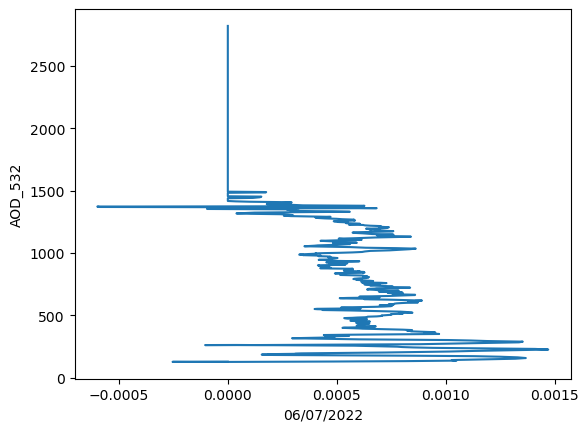

In [9]:
fig, ax = plt.subplots()
ax.plot(AOD, DAY7_subset[' GPS_Altitude_THORNHILL'])
#ax.set_xscale('log')
#ax.set_xlim(0,0.0015)
ax.set_ylabel('AOD_532')
ax.set_xlabel('06/07/2022')

Text(0.5, 0, '06/07/2022')

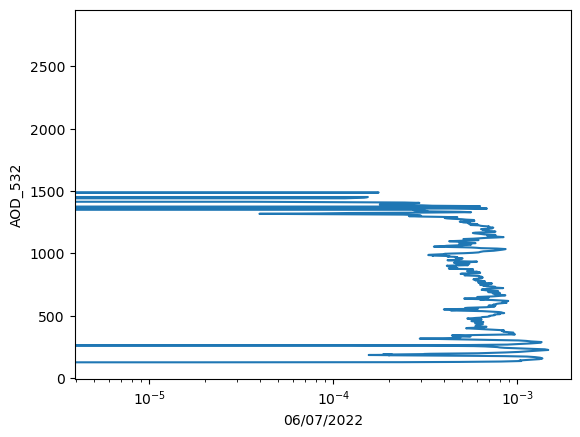

In [39]:
fig, ax = plt.subplots()
ax.plot(AOD, DAY7_subset[' GPS_Altitude_THORNHILL'])
ax.set_xscale('log')
ax.set_ylabel('AOD_532')
ax.set_xlabel('06/07/2022')

In [11]:
DAY = simple_read('C:/Users/taiwoajayi/Documents/Extinction/activate-mrg1_hu25_20220607_R0_L1_20230523T125154.ict')
DAY['Altitude'] = DAY7[' GPS_Altitude_THORNHILL'].diff(periods=1)
DAY['Altitude']
DAYY = DAY.assign(Altitude=DAY['Altitude'])
DAYY = DAY.replace(np.NaN, 0)
start_index = np.where(DAYY["Time_Start"]==pd.to_datetime("2022-06-07 14:32:00"))
stop_index = np.where(DAYY["Time_Start"]==pd.to_datetime("2022-06-07 14:47:00"))
DAYY7 =DAYY[start_index[0][0]:stop_index[0][0]]
DAYY7

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Pressure_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Sc550_submicron_amb_ZIEMBA,Sc450_submicron_ZIEMBA,...,fRH550_RH20to80_ZIEMBA,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA,SSA_450nm_ZIEMBA,SSA_550nm_ZIEMBA,SSA_700nm_ZIEMBA,SSA_amb_550nm_ZIEMBA,stdPT_ZIEMBA,Altitude
10397,2022-06-07 14:32:00,2022-06-07 14:32:01,32.250498,-64.999220,127.595,47.370,21.705,1000.690,22.625,23.875,...,1.245,0.615,0.525,0.0,0.0,0.0,0.0,0.0,1.0930,-1.090
10398,2022-06-07 14:32:01,2022-06-07 14:32:02,32.249883,-64.998233,126.585,45.625,21.705,1000.730,24.015,24.615,...,1.395,0.620,0.530,0.0,0.0,0.0,0.0,0.0,1.0930,-1.010
10399,2022-06-07 14:32:02,2022-06-07 14:32:03,32.249267,-64.997244,125.870,49.065,21.700,1000.550,23.895,25.450,...,1.520,0.625,0.540,0.0,0.0,0.0,0.0,0.0,1.0930,-0.715
10400,2022-06-07 14:32:03,2022-06-07 14:32:04,32.248648,-64.996254,125.955,40.945,21.735,1000.850,21.175,24.125,...,1.535,0.635,0.560,0.0,0.0,0.0,0.0,0.0,1.0930,0.085
10401,2022-06-07 14:32:04,2022-06-07 14:32:05,32.248027,-64.995263,126.990,32.150,21.755,1001.140,21.990,24.315,...,1.445,0.640,0.570,0.0,0.0,0.0,0.0,0.0,1.0930,1.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292,2022-06-07 14:46:55,2022-06-07 14:46:56,32.255021,-64.999573,2800.660,8501.310,9.430,728.710,0.000,2.075,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1.4385,5.150
11293,2022-06-07 14:46:56,2022-06-07 14:46:57,32.255098,-64.998248,2805.770,8518.170,9.405,728.240,0.000,2.680,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,1.4395,5.110
11294,2022-06-07 14:46:57,2022-06-07 14:46:58,32.255152,-64.996919,2810.920,8534.370,9.380,727.790,0.000,3.425,...,0.000,0.000,1.650,0.0,0.0,0.0,0.0,0.0,1.4400,5.150
11295,2022-06-07 14:46:58,2022-06-07 14:46:59,32.255184,-64.995588,2816.140,8550.220,9.355,727.350,0.000,1.540,...,0.000,0.000,1.650,0.0,0.0,0.0,0.0,0.0,1.4405,5.220


In [12]:
AOD7 = (DAYY7[' Ext532_submicron_amb_ZIEMBA']*10e-6)*DAYY7['Altitude']
AOD7

10397   -0.000259
10398   -0.000254
10399   -0.000176
10400    0.000019
10401    0.000237
           ...   
11292    0.000000
11293    0.000000
11294    0.000000
11295    0.000000
11296    0.000000
Length: 900, dtype: float64

In [13]:
AOD7.sum()

0.2909594642500001

In [17]:
DAY18 = simple_read('C:/Users/taiwoajayi/Documents/Extinction/activate-mrg1_hu25_20220618_R0_20230523T125200.ict')
DAY18['Altitude'] = DAY18[' GPS_Altitude_THORNHILL'].diff(periods=1)
DAY18['Altitude']
DAYY18 = DAY18.assign(Altitude=DAY18['Altitude'])
DAYY18 = DAY18.replace(np.NaN, 0)
start_index = np.where(DAYY18["Time_Start"]==pd.to_datetime("2022-06-18 14:09:00"))
stop_index = np.where(DAYY18["Time_Start"]==pd.to_datetime("2022-06-18 14:33:00"))
DAYY18_subset =DAYY18[start_index[0][0]:stop_index[0][0]]
#DAYY_subset = DAYY_subset.replace(-888888, 0)
DAYY18_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Pressure_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Sc550_submicron_amb_ZIEMBA,Sc450_submicron_ZIEMBA,...,fRH550_RH20to80_ZIEMBA,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA,SSA_450nm_ZIEMBA,SSA_550nm_ZIEMBA,SSA_700nm_ZIEMBA,SSA_amb_550nm_ZIEMBA,stdPT_ZIEMBA,Altitude
7425,2022-06-18 14:09:00,2022-06-18 14:09:01,36.589500,-71.990803,110.135,428.715,25.275,987.185,19.110,27.790,...,1.035,1.450,1.445,0.000,0.9595,0.000,0.0000,0.0,1.1215,0.105
7426,2022-06-18 14:09:01,2022-06-18 14:09:02,36.590250,-71.991516,110.155,426.230,25.270,987.250,17.185,27.195,...,1.200,1.450,1.450,0.000,0.9620,0.000,0.0000,0.0,1.1210,0.020
7427,2022-06-18 14:09:02,2022-06-18 14:09:03,36.591026,-71.992186,109.965,424.700,25.290,987.330,17.100,26.575,...,1.250,1.445,1.440,0.000,0.9620,0.000,0.0000,0.0,1.1210,-0.190
7428,2022-06-18 14:09:03,2022-06-18 14:09:04,36.591824,-71.992808,109.535,415.290,25.335,987.780,17.105,26.190,...,1.250,1.425,1.415,0.000,0.9605,0.000,0.0000,0.0,1.1210,-0.430
7429,2022-06-18 14:09:04,2022-06-18 14:09:05,36.592643,-71.993383,109.055,410.005,25.360,988.055,18.650,25.315,...,1.190,1.410,1.400,0.000,0.9560,0.000,0.0000,0.0,1.1210,-0.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8860,2022-06-18 14:32:55,2022-06-18 14:32:56,36.634224,-71.921855,7949.270,24787.600,-24.560,370.935,0.000,7.275,...,0.000,-0.670,0.000,0.755,0.3705,0.184,0.0000,0.0,2.4860,4.920
8861,2022-06-18 14:32:56,2022-06-18 14:32:57,36.634412,-71.923239,7954.260,24800.800,-24.595,370.705,0.000,2.700,...,0.000,-0.670,2.550,0.810,0.3595,0.000,0.2070,0.0,2.4875,4.990
8862,2022-06-18 14:32:57,2022-06-18 14:32:58,36.634602,-71.924625,7959.290,24817.600,-24.645,370.415,0.000,0.710,...,0.000,-0.670,2.400,0.905,0.3535,0.000,0.2225,0.0,2.4885,5.030
8863,2022-06-18 14:32:58,2022-06-18 14:32:59,36.634793,-71.926012,7964.380,24832.700,-24.695,370.160,0.000,0.755,...,0.000,-0.670,2.290,1.075,0.3485,0.000,0.2370,0.0,2.4895,5.090


In [21]:
AOD18 = (DAYY18[' Ext532_submicron_amb_ZIEMBA']*10e-6)*DAYY18['Altitude']
AOD18.sum()

0.35890219399999984

Text(0.5, 0, '06/07/2022')

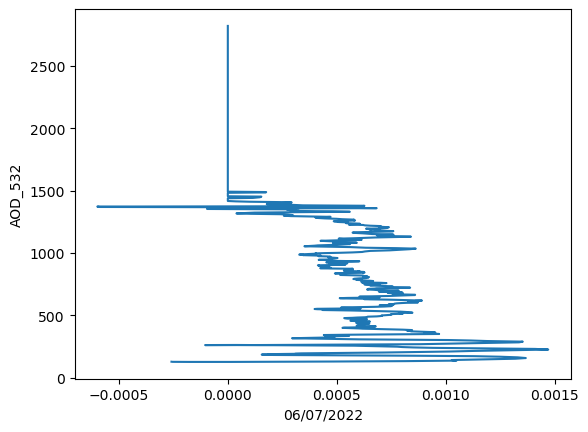

In [28]:
fig, ax = plt.subplots()
ax.plot(AOD7, DAYY7[' GPS_Altitude_THORNHILL'])
#ax.set_xscale('log')
ax.set_ylabel('AOD_532')
ax.set_xlabel('06/07/2022')

In [23]:
DAY17 = simple_read('C:/Users/taiwoajayi/Documents/Extinction/activate-mrg1_hu25_20220617_R0_20230523T125200.ict')
DAY17['Altitude'] = DAY17[' GPS_Altitude_THORNHILL'].diff(periods=1)
DAYY17 = DAY17.assign(Altitude=DAY17['Altitude'])
DAYY17 = DAY17.replace(np.NaN, 0)
start17_index = np.where(DAYY17["Time_Start"]==pd.to_datetime("2022-06-17 16:20:00"))
stop17_index = np.where(DAYY17["Time_Start"]==pd.to_datetime("2022-06-17 16:47:00"))
DAYY17_subset =DAYY17[start17_index[0][0]:stop17_index[0][0]]
#DAYY_subset = DAYY_subset.replace(-888888, 0)
DAYY17_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Pressure_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Sc550_submicron_amb_ZIEMBA,Sc450_submicron_ZIEMBA,...,fRH550_RH20to80_ZIEMBA,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA,SSA_450nm_ZIEMBA,SSA_550nm_ZIEMBA,SSA_700nm_ZIEMBA,SSA_amb_550nm_ZIEMBA,stdPT_ZIEMBA,Altitude
10469,2022-06-17 16:20:00,2022-06-17 16:20:01,32.206574,-65.006772,134.100,184.735,21.905,995.935,14.935,12.975,...,1.525,-0.230,-0.270,0.000,0.0,0.0,0.0,0.0,1.0990,-0.285
10470,2022-06-17 16:20:01,2022-06-17 16:20:02,32.206131,-65.005761,133.795,173.170,21.935,996.415,15.045,14.420,...,1.365,-0.225,-0.260,0.000,0.0,0.0,0.0,0.0,1.0985,-0.305
10471,2022-06-17 16:20:02,2022-06-17 16:20:03,32.205725,-65.004728,133.485,163.920,21.940,996.745,15.455,14.705,...,1.180,-0.210,-0.235,0.000,0.0,0.0,0.0,0.0,1.0980,-0.310
10472,2022-06-17 16:20:03,2022-06-17 16:20:04,32.205357,-65.003676,133.170,169.310,21.930,996.505,14.330,14.170,...,1.025,-0.180,-0.195,0.000,0.0,0.0,0.0,0.0,1.0985,-0.315
10473,2022-06-17 16:20:04,2022-06-17 16:20:05,32.205027,-65.002606,132.825,170.890,21.950,996.455,13.950,12.900,...,0.935,-0.170,-0.185,0.000,0.0,0.0,0.0,0.0,1.0990,-0.345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12084,2022-06-17 16:46:55,2022-06-17 16:46:56,32.158601,-65.020304,7639.050,23452.500,-17.335,393.290,0.000,-2.050,...,0.000,0.000,0.000,1.315,0.0,0.0,0.0,0.0,2.4130,6.740
12085,2022-06-17 16:46:56,2022-06-17 16:46:57,32.157293,-65.019563,7645.810,23471.700,-17.400,392.950,0.000,-0.155,...,0.000,0.000,0.000,1.370,0.0,0.0,0.0,0.0,2.4145,6.760
12086,2022-06-17 16:46:57,2022-06-17 16:46:58,32.156002,-65.018778,7652.610,23491.400,-17.450,392.615,0.000,2.160,...,0.000,0.000,0.000,1.435,0.0,0.0,0.0,0.0,2.4160,6.800
12087,2022-06-17 16:46:58,2022-06-17 16:46:59,32.154729,-65.017953,7659.440,23514.200,-17.510,392.220,0.000,3.490,...,0.000,0.000,0.000,1.420,0.0,0.0,0.0,0.0,2.4180,6.830


In [24]:
AOD17 = (DAYY17[' Ext532_submicron_amb_ZIEMBA']*10e-6)*DAYY17['Altitude']
AOD17.sum()

0.17296718449999965

In [25]:
DAY13 = simple_read('C:/Users/taiwoajayi/Documents/Extinction/activate-mrg1_hu25_20220613_R0_L1_20230523T125158.ict')
DAY13['Altitude'] = DAY13[' GPS_Altitude_THORNHILL'].diff(periods=1)
DAYY13 = DAY13.assign(Altitude=DAY13['Altitude'])
DAYY13 = DAY13.replace(np.NaN, 0)
start13_index = np.where(DAYY13["Time_Start"]==pd.to_datetime("2022-06-13 14:30:00"))
stop13_index = np.where(DAYY13["Time_Start"]==pd.to_datetime("2022-06-13 14:46:00"))
DAYY13_subset =DAYY13[start13_index[0][0]:stop13_index[0][0]]
#DAYY_subset = DAYY_subset.replace(-888888, 0)
DAYY13_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Pressure_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Sc550_submicron_amb_ZIEMBA,Sc450_submicron_ZIEMBA,...,fRH550_RH20to80_ZIEMBA,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA,SSA_450nm_ZIEMBA,SSA_550nm_ZIEMBA,SSA_700nm_ZIEMBA,SSA_amb_550nm_ZIEMBA,stdPT_ZIEMBA,Altitude
10015,2022-06-13 14:30:00,2022-06-13 14:30:01,32.210354,-65.054053,141.795,27.095,23.865,1001.400,9.180,9.305,...,1.110,0.850,0.920,0.000,0.0,0.00000,0.00000,0.0,1.1000,-0.060
10016,2022-06-13 14:30:01,2022-06-13 14:30:02,32.209934,-65.052981,141.725,31.175,23.835,1001.240,8.750,8.290,...,1.080,0.865,0.885,0.000,0.0,0.00000,0.00000,0.0,1.1000,-0.070
10017,2022-06-13 14:30:02,2022-06-13 14:30:03,32.209541,-65.051894,141.615,24.580,23.830,1001.510,9.355,10.685,...,1.085,0.880,0.840,0.000,0.0,0.00000,0.00000,0.0,1.1000,-0.110
10018,2022-06-13 14:30:03,2022-06-13 14:30:04,32.209173,-65.050793,141.460,17.190,23.855,1001.800,9.720,13.600,...,1.230,0.885,0.790,0.000,0.0,0.00000,0.00000,0.0,1.1000,-0.155
10019,2022-06-13 14:30:04,2022-06-13 14:30:05,32.208832,-65.049680,141.275,20.190,23.840,1001.640,10.595,13.700,...,1.260,0.890,0.765,0.000,0.0,0.00000,0.00000,0.0,1.1000,-0.185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10970,2022-06-13 14:45:55,2022-06-13 14:45:56,32.197220,-65.046274,4504.770,13659.500,-0.020,594.015,0.000,0.435,...,0.000,0.000,0.000,1.285,0.0,0.21602,0.22940,0.0,1.7055,10.620
10971,2022-06-13 14:45:56,2022-06-13 14:45:57,32.196954,-65.044914,4514.670,13690.000,-0.115,593.295,0.000,3.665,...,0.000,0.000,0.000,1.400,0.0,0.20603,0.22384,0.0,1.7070,9.900
10972,2022-06-13 14:45:57,2022-06-13 14:45:58,32.196726,-65.043543,4523.980,13720.100,-0.215,592.580,0.000,3.680,...,0.000,0.000,0.000,1.440,0.0,0.20906,0.21627,0.0,1.7085,9.310
10973,2022-06-13 14:45:58,2022-06-13 14:45:59,32.196539,-65.042160,4532.940,13748.700,-0.295,591.910,0.000,-0.205,...,0.000,0.000,0.000,1.410,0.0,0.22361,0.20780,0.0,1.7100,8.960


In [38]:
DAY13b = simple_read('C:/Users/taiwoajayi/Documents/Extinction/activate-mrg1_hu25_20220613_R0_L2_20230523T125158.ict')
DAY13b['Altitude'] = DAY13b[' GPS_Altitude_THORNHILL'].diff(periods=1)
DAY13b['Altitude']
DAYY13b = DAY13b.assign(Altitude=DAY13b['Altitude'])
DAYY13b = DAY13b.replace(np.NaN, 0)
DAYY13b
start13b_index = np.where(DAYY13b["Time_Start"]==pd.to_datetime("2022-06-13 19:46:00"))
stop13b_index = np.where(DAYY13b["Time_Start"]==pd.to_datetime("2022-06-13 20:09:00"))
DAYY13b_subset =DAYY13b[start13b_index[0][0]:stop13b_index[0][0]]
DAYY13b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Pressure_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Sc550_submicron_amb_ZIEMBA,Sc450_submicron_ZIEMBA,...,fRH550_RH20to80_ZIEMBA,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA,SSA_450nm_ZIEMBA,SSA_550nm_ZIEMBA,SSA_700nm_ZIEMBA,SSA_amb_550nm_ZIEMBA,stdPT_ZIEMBA,Altitude
10610,2022-06-13 19:46:00,2022-06-13 19:46:01,32.251226,-65.007304,106.13,-92.470,24.700,1005.880,0.0,8.675,...,0.0,0.605,0.895,0.000,0.0,0.0,0.0,0.0,1.0980,-1.325
10611,2022-06-13 19:46:01,2022-06-13 19:46:02,32.250414,-65.006555,105.59,-79.165,24.680,1005.410,0.0,8.150,...,0.0,0.560,0.855,0.000,0.0,0.0,0.0,0.0,1.0985,-0.540
10612,2022-06-13 19:46:02,2022-06-13 19:46:03,32.249605,-65.005808,106.45,-55.360,24.620,1004.580,0.0,8.380,...,0.0,0.500,0.815,0.000,0.0,0.0,0.0,0.0,1.0995,0.860
10613,2022-06-13 19:46:03,2022-06-13 19:46:04,32.248799,-65.005062,108.91,-36.300,24.565,1003.920,0.0,4.835,...,0.0,0.480,0.795,0.000,0.0,0.0,0.0,0.0,1.1000,2.460
10614,2022-06-13 19:46:04,2022-06-13 19:46:05,32.247996,-65.004323,112.60,-30.565,24.550,1003.770,0.0,3.700,...,0.0,0.415,0.790,0.000,0.0,0.0,0.0,0.0,1.1000,3.690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,2022-06-13 20:08:55,2022-06-13 20:08:56,32.290180,-64.996666,4558.09,13794.600,0.615,589.975,0.0,1.610,...,0.0,0.000,0.000,1.325,0.0,0.0,0.0,0.0,1.7215,7.470
11986,2022-06-13 20:08:56,2022-06-13 20:08:57,32.289203,-64.997413,4565.53,13817.600,0.565,589.425,0.0,1.625,...,0.0,0.000,0.000,1.235,0.0,0.0,0.0,0.0,1.7225,7.440
11987,2022-06-13 20:08:57,2022-06-13 20:08:58,32.288204,-64.998124,4572.98,13843.900,0.505,588.785,0.0,1.645,...,0.0,0.000,0.000,1.180,0.0,0.0,0.0,0.0,1.7240,7.450
11988,2022-06-13 20:08:58,2022-06-13 20:08:59,32.287185,-64.998799,4580.36,13865.500,0.450,588.260,0.0,0.170,...,0.0,0.000,0.000,1.190,0.0,0.0,0.0,0.0,1.7255,7.380


In [52]:
DAY7b = simple_read('C:/Users/taiwoajayi/Documents/Extinction/activate-mrg1_hu25_20220607_R0_L2_20230523T125154.ict')
DAY7b['Altitude'] = DAY7b[' GPS_Altitude_THORNHILL'].diff(periods=1)
DAYY7b = DAY7b.assign(Altitude=DAY7b['Altitude'])
DAYY7b = DAY7b.replace(np.NaN, 0)
start7b_index = np.where(DAYY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:08:00"))
stop7b_index = np.where(DAYY7b["Time_Start"]==pd.to_datetime("2022-06-07 19:23:00"))
DAYY7b_subset =DAYY7b[start7b_index[0][0]:stop7b_index[0][0]]
#DAYY_subset = DAYY_subset.replace(-888888, 0)
DAYY7b_subset

,Time_Start,Time_Stop,Latitude_THORNHILL,Longitude_THORNHILL,GPS_Altitude_THORNHILL,Pressure_Altitude_THORNHILL,Static_Air_Temp_THORNHILL,Static_Pressure_THORNHILL,Sc550_submicron_amb_ZIEMBA,Sc450_submicron_ZIEMBA,...,fRH550_RH20to80_ZIEMBA,AEscatAMB_450to700nm_ZIEMBA,AEscat_450to700nm_ZIEMBA,AEabsDRY_470to660nm_ZIEMBA,SSA_450nm_ZIEMBA,SSA_550nm_ZIEMBA,SSA_700nm_ZIEMBA,SSA_amb_550nm_ZIEMBA,stdPT_ZIEMBA,Altitude
10420,2022-06-07 19:08:00,2022-06-07 19:08:01,32.242823,-65.003952,133.320,32.825,21.455,1000.570,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0920,-0.250
10421,2022-06-07 19:08:01,2022-06-07 19:08:02,32.243085,-65.002775,133.120,35.770,21.445,1000.450,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0920,-0.200
10422,2022-06-07 19:08:02,2022-06-07 19:08:03,32.243347,-65.001596,132.930,36.115,21.440,1000.440,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0920,-0.190
10423,2022-06-07 19:08:03,2022-06-07 19:08:04,32.243610,-65.000416,132.720,34.755,21.460,1000.480,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0920,-0.210
10424,2022-06-07 19:08:04,2022-06-07 19:08:05,32.243873,-64.999235,132.595,58.515,21.475,999.490,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0930,-0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11315,2022-06-07 19:22:55,2022-06-07 19:22:56,32.296480,-65.011792,3518.030,10714.600,5.895,667.750,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5505,6.750
11316,2022-06-07 19:22:56,2022-06-07 19:22:57,32.296519,-65.013093,3524.890,10734.200,5.850,667.230,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5515,6.860
11317,2022-06-07 19:22:57,2022-06-07 19:22:58,32.296518,-65.014396,3531.840,10756.100,5.795,666.645,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5525,6.950
11318,2022-06-07 19:22:58,2022-06-07 19:22:59,32.296479,-65.015699,3538.850,10779.600,5.735,666.015,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5535,7.010


In [53]:
AOD7b = (DAYY7b_subset[' Ext532_submicron_amb_ZIEMBA']*10e-6)*DAYY7b_subset['Altitude']
AOD7b.sum()

0.0